In [1]:
# should ther be an error about chrome version, check version and download the right version to replace the old one
# ref: https://stackoverflow.com/questions/60296873/sessionnotcreatedexception-message-session-not-created-this-version-of-chrome

from ScrapingData.Operations_4 import *
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from IPython.display import Image 
from PIL import Image as pim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def GetFearAndGreed():
    #########
    filepath='C:/Users/70018928/Downloads/'
    #########
    url='https://money.cnn.com/data/fear-and-greed/'
    
    filename='MY_SCREENSHOT'     
  
    
    option=webdriver.ChromeOptions()
    option.add_argument("--incognito")
    driver = webdriver.Chrome(chrome_options=option)
    driver.implicitly_wait(30)
    driver.get(url)
   
    element = driver.find_element_by_xpath("//div[@id='needleChart']")

    location = element.location
    size = element.size

    driver.save_screenshot(filepath+filename+'.PNG')

    x = location['x']
    y = location['y']
    width = location['x']+size['width']
    #height = location['y']+(int(size['height'])/2)
    height = location['y']+size['height']

    im = pim.open(filepath+filename+'.PNG')
    #im = im.crop((int(x), int(y), int(width)/1.8, int(height)))
    im = im.crop((int(x), int(y), int(width), int(height)))
    im.save(filepath+filename+'.PNG')
    driver.quit()
    print(' >>>>>>>> Fear and Greed < 50% is a BUY signal <<<<<<<<<')
    display(Image(filename=filepath+filename+'.PNG', width=600, height=300) )




C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
### Read data from Google Sheet
readSheet=ReadSheet()
sheetFList=readSheet.Authorization_BenchmarkScraped()

dfList=[]
for n in sheetFList:
    dfIn=readSheet.LoadSheet(n)
    dfList.append(dfIn)

    
fundDict=dict(zip(BenchmarkScrapedList,dfList))

del sheetFList

-------------  VIX  //////////////////////


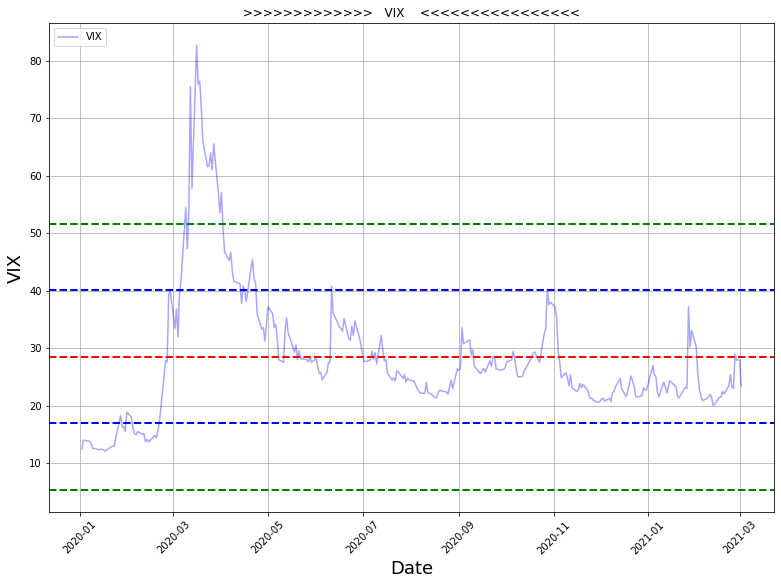

-------------  MSCIUS  //////////////////////


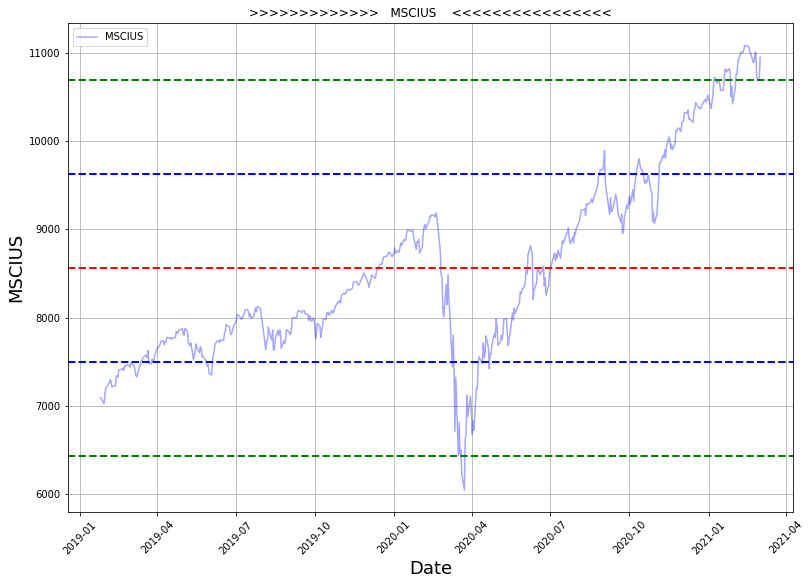

-------------  MSCICN  //////////////////////
MSCICN ::  See comparatively MSCI-CN and S&P500 Variance to see if China market is already expensive comparing with that of US// Here MSCI CN even higher than S&P500, so China Market is even more expensive than US market


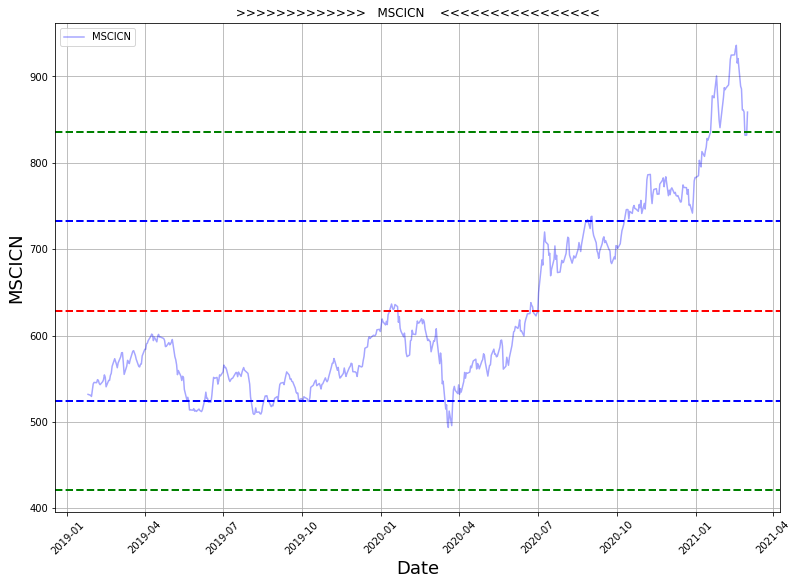

-------------  ARKW  //////////////////////


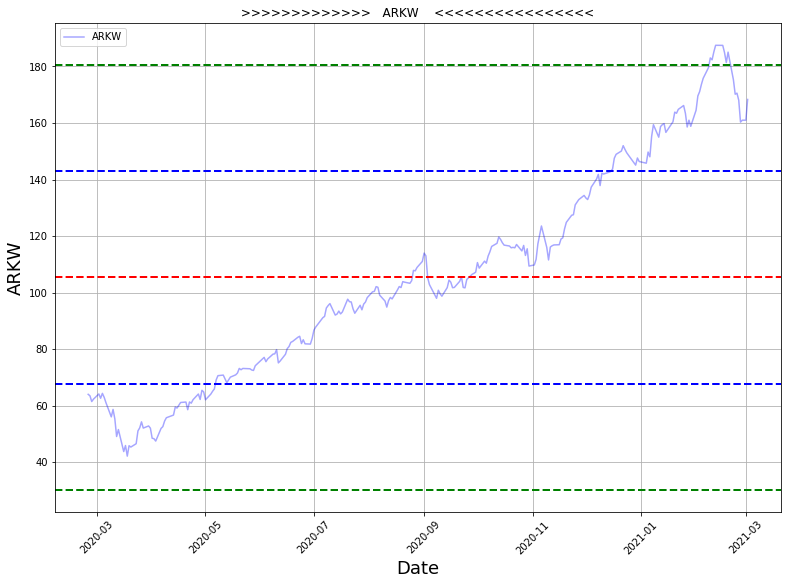

 >>>>>>>> Fear and Greed < 50% is a BUY signal <<<<<<<<<


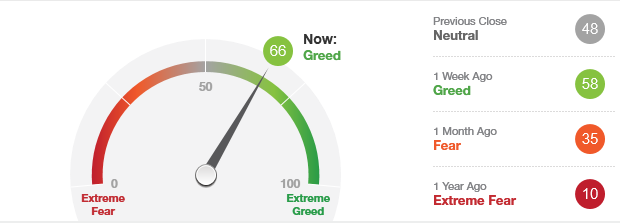

In [3]:
for fundName in BenchmarkScrapedList:    
    print('------------- ', fundName, ' //////////////////////')
    dfIn=fundDict[fundName]    
    dfIn=dfIn.set_index(['Date'])
    
    title=' >>>>>>>>>>>>>   '+fundName+'    <<<<<<<<<<<<<<<< '
    
    if(fundName=='MSCICN'):
        print(fundName, '::  See comparatively MSCI-CN and S&P500 Variance to see if China market is already expensive comparing with that of US// Here MSCI CN even higher than S&P500, so China Market is even more expensive than US market')
    
    fig, axs = plt.subplots(figsize=(13,9))
    axs.plot(dfIn['Price'], label=fundName, color='blue', alpha=0.35)
    axs.axhline(y=dfIn['Price'].mean(), color='r', linestyle='--', lw=2)
    axs.axhline(y=dfIn['Price'].mean()-dfIn['Price'].std(), color='b', linestyle='--', lw=2)
    axs.axhline(y=dfIn['Price'].mean()+dfIn['Price'].std(), color='b', linestyle='--', lw=2)
    axs.axhline(y=dfIn['Price'].mean()-2*dfIn['Price'].std(), color='g', linestyle='--', lw=2)
    axs.axhline(y=dfIn['Price'].mean()+2*dfIn['Price'].std(), color='g', linestyle='--', lw=2)
    plt.xticks(rotation=45)
    axs.set_title(title)
    axs.set_xlabel('Date', fontsize=18)
    axs.set_ylabel(fundName, fontsize=18)
    axs.legend(loc='upper left')
    axs.grid()
    plt.show()
    
GetFearAndGreed()

In [4]:
### Read data from Google Sheet
sheetBList=readSheet.Authorization_Benchmark()
sheetMList=readSheet.Authorization_Benchmark_2()


dfList=[]
for n in sheetBList:
    dfIn=readSheet.LoadSheet(n)
    dfList.append(dfIn)

dBList=[]
for n in sheetMList:
    dfIn=readSheet.LoadSheet(n)
    dBList.append(dfIn)
    
fundDict=dict(zip(BenchmarkList_1,dfList))
fundDict_2=dict(zip(BenchmarkList_2,dBList))

del dfIn, sheetBList, sheetMList



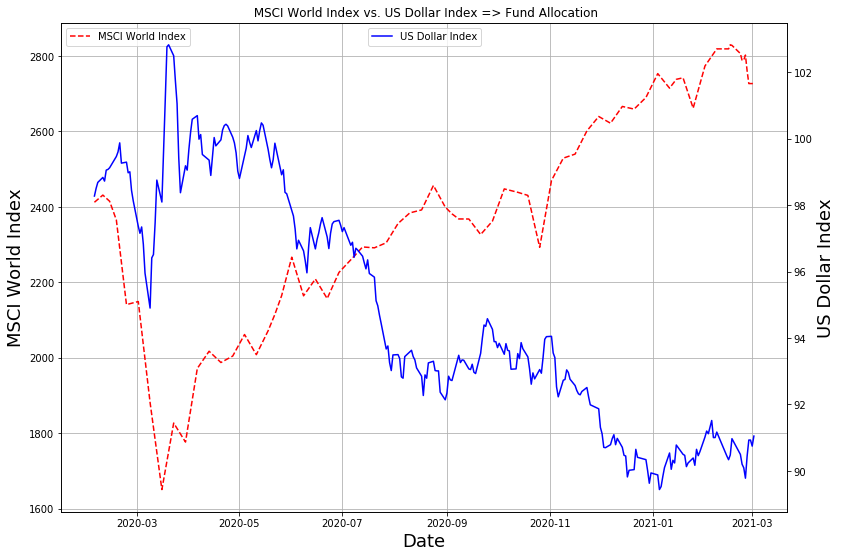

In [5]:
pairList=['USDIndex','MSCIW']

for n1, n2 in zip(dfList, dBList):
    #print(n1,' :::  ',n2)
    dummy1=n1[['Date','Price']].copy()
    dummy1=dummy1.set_index('Date')
    dummy2=n2[['Date','Price']].copy()
    dummy2=dummy2.set_index('Date')
    merge=pd.merge(dummy2, dummy1, how='inner', left_index=True, right_index=True)

merge.columns=['MSCIW','USDIndex']

merge=merge.replace("null",np.nan)
merge=merge.dropna()

fig, axs=plt.subplots(figsize=(13,9))
ax2=axs.twinx()
axs.plot(merge['MSCIW'], label='MSCI World Index', color='red',linestyle='--', alpha=2)
ax2.plot(merge['USDIndex'], label='US Dollar Index', color='blue', alpha=2)
plt.xticks(rotation=45)
axs.set_title(' MSCI World Index vs. US Dollar Index => Fund Allocation')
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('MSCI World Index', fontsize=18)
ax2.set_ylabel('US Dollar Index', fontsize=18)
axs.legend(loc='upper left')
ax2.legend(loc='upper center')
axs.grid()
plt.show()            


del dummy1, dummy2, dfList, dBList

# US Dollar Index depreciation could benefit the Global economic condition/ market, Emerging market could receive this benefit. Money will flow from Growth stock to Value Stock in 2021.